In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [18]:
from scipy.stats import chi2_contingency  #chi square calculation

In [19]:
airline_delay = pd.read_csv('airline_delay.csv')

In [20]:
airline_delay.head()

year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4                   Albany, NY: Albany International         76.0       11.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.63         0.0  ...          0.0              1.25            0.0   
1        0.96         0.0  ...          0.0              0.00            0.0   
2        5.75         0.0  ...          0.0              0.65            0.0   
3        4.17         0.0  ...          0.0              3.00            0.0   
4        4.78         0.0  ...          0.0              1.00            1.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0       89.0           56.0            0.0        3.0   
1           0.0       23.0           22.0            0.0        1.0   
2           1.0      338.0          265.0            0.0       45.0   
3           0.0      508.0          192.0            0.0       92.0   
4           0.0      692.0          398.0            0.0      178.0   

   security_delay  late_aircraft_delay  
0             0.0                 30.0  
1             0.0                  0.0  
2             0.0                 28.0  
3             0.0                224.0  
4             0.0                116.0  

[5 rows x 21 columns]

In [21]:
airline_delay.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [22]:
airline_delay.isna().any()

year                   False
month                  False
carrier                False
carrier_name           False
airport                False
airport_name           False
arr_flights             True
arr_del15               True
carrier_ct              True
weather_ct              True
nas_ct                  True
security_ct             True
late_aircraft_ct        True
arr_cancelled           True
arr_diverted            True
arr_delay               True
carrier_delay           True
weather_delay           True
nas_delay               True
security_delay          True
late_aircraft_delay     True
dtype: bool

In [23]:
airline_delay = airline_delay.fillna(value = 0.0)

In [30]:
correlations = airline_delay.drop(['year', 'month', 'carrier', 'carrier_name'], axis=1).corr()

C:\Users\User\AppData\Local\Temp\ipykernel_20332\314970380.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = airline_delay.drop(['year', 'month', 'carrier', 'carrier_name'], axis=1).corr()


<Axes: >

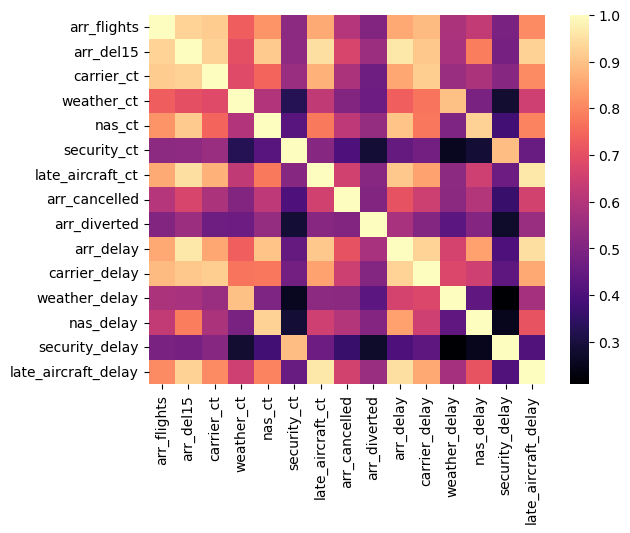

In [32]:
sns.heatmap(correlations, cmap = 'magma')

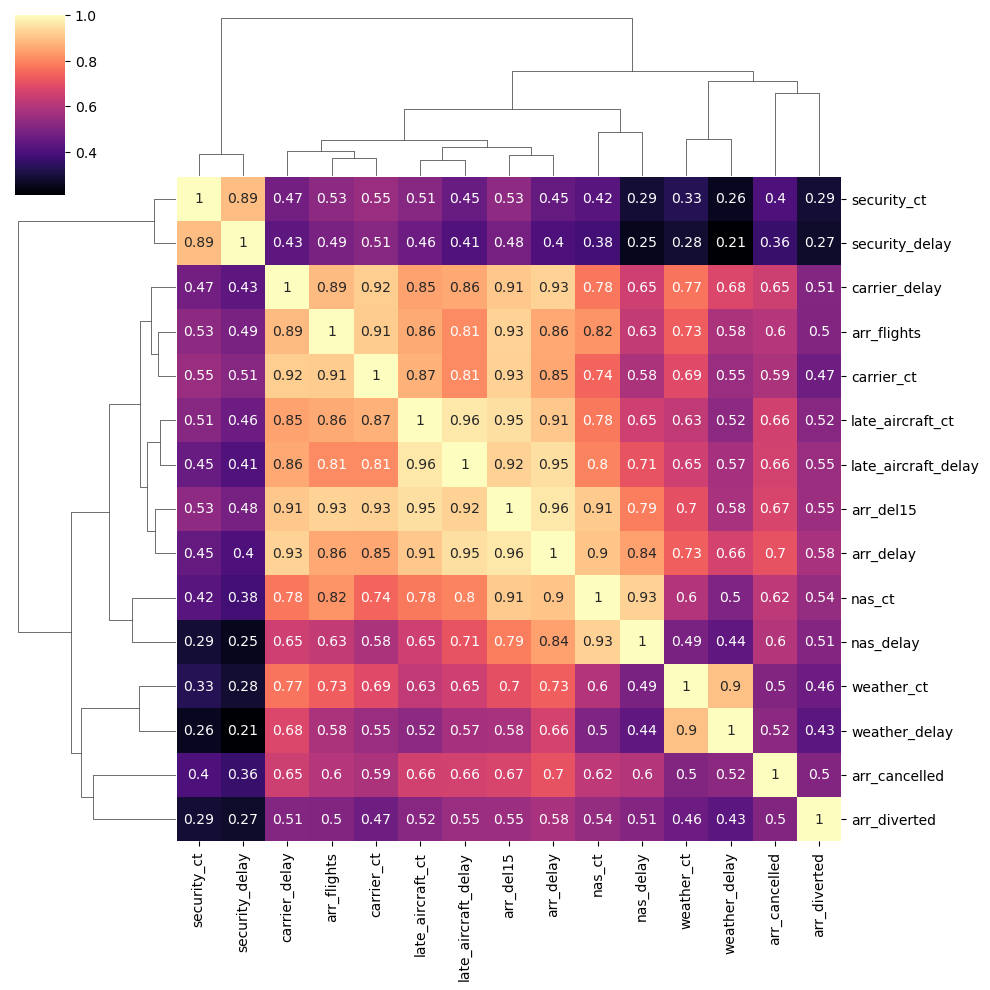

In [34]:
sns.clustermap(correlations, annot = True, cmap = 'magma')

In [156]:
correlations_2019 = airline_delay[airline_delay['year'] == 2019].drop(['airport', 'airport_name','year', 'month', 'carrier', 'carrier_name'], axis=1).corr()

<Axes: >

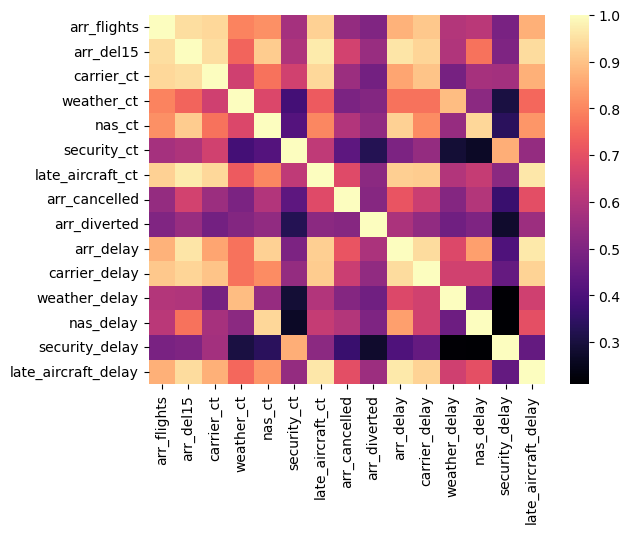

In [159]:
sns.heatmap(correlations_2019, cmap = 'magma')

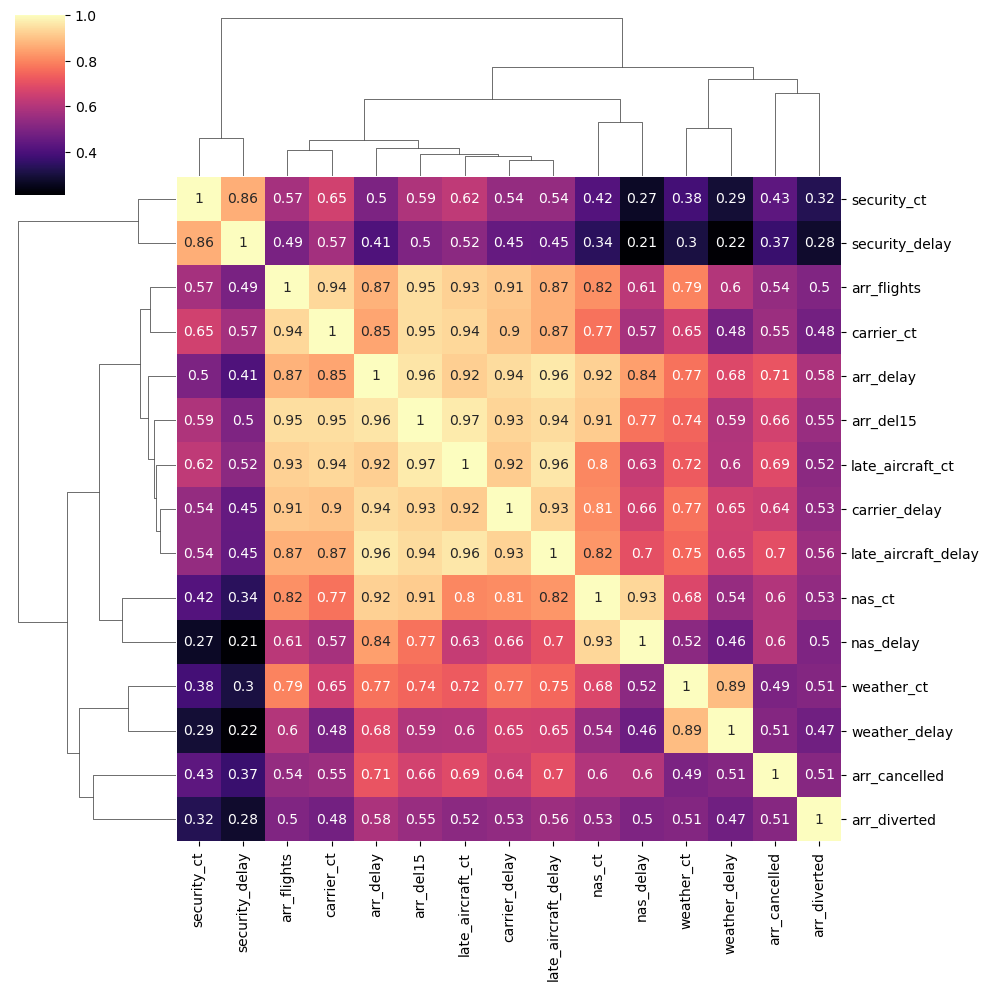

In [157]:
sns.clustermap(correlations_2019, annot = True, cmap = 'magma')

In [160]:
correlations_2020 = airline_delay[airline_delay['year'] == 2020].drop(['airport', 'airport_name','year', 'month', 'carrier', 'carrier_name'], axis=1).corr()

<Axes: >

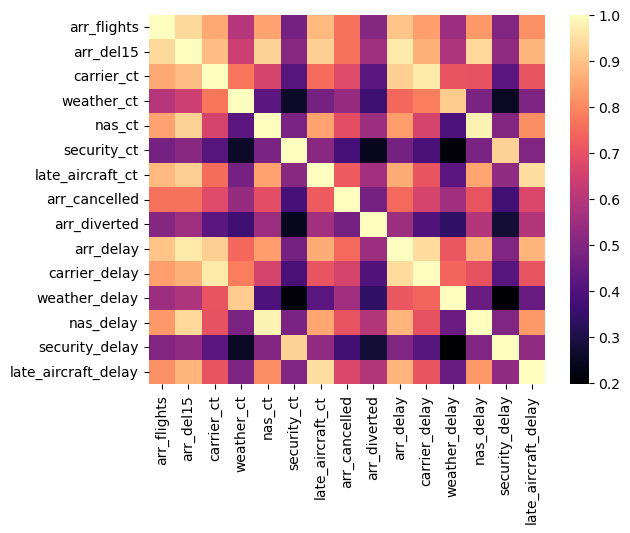

In [161]:
sns.heatmap(correlations_2020, cmap = 'magma')

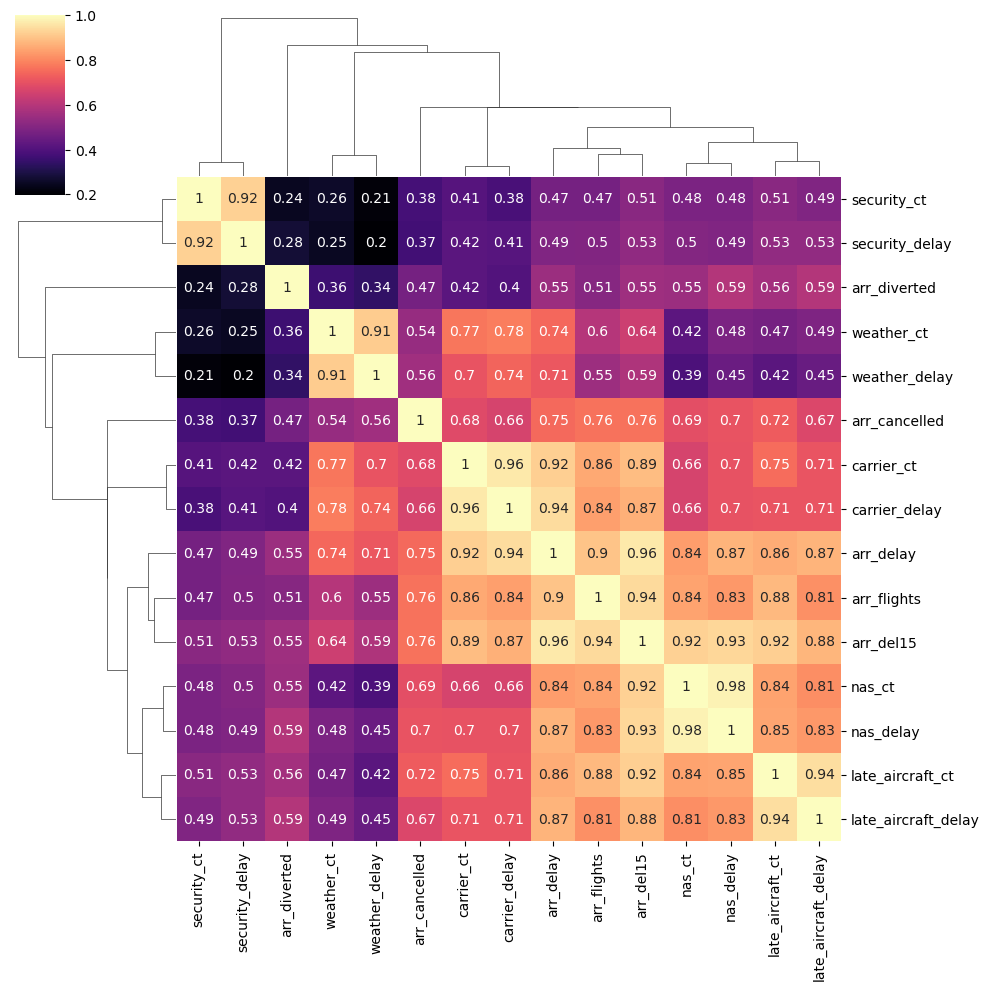

In [163]:
sns.clustermap(correlations_2020, annot = True, cmap = 'magma')

In [37]:
airline_delay['month'].nunique()

1

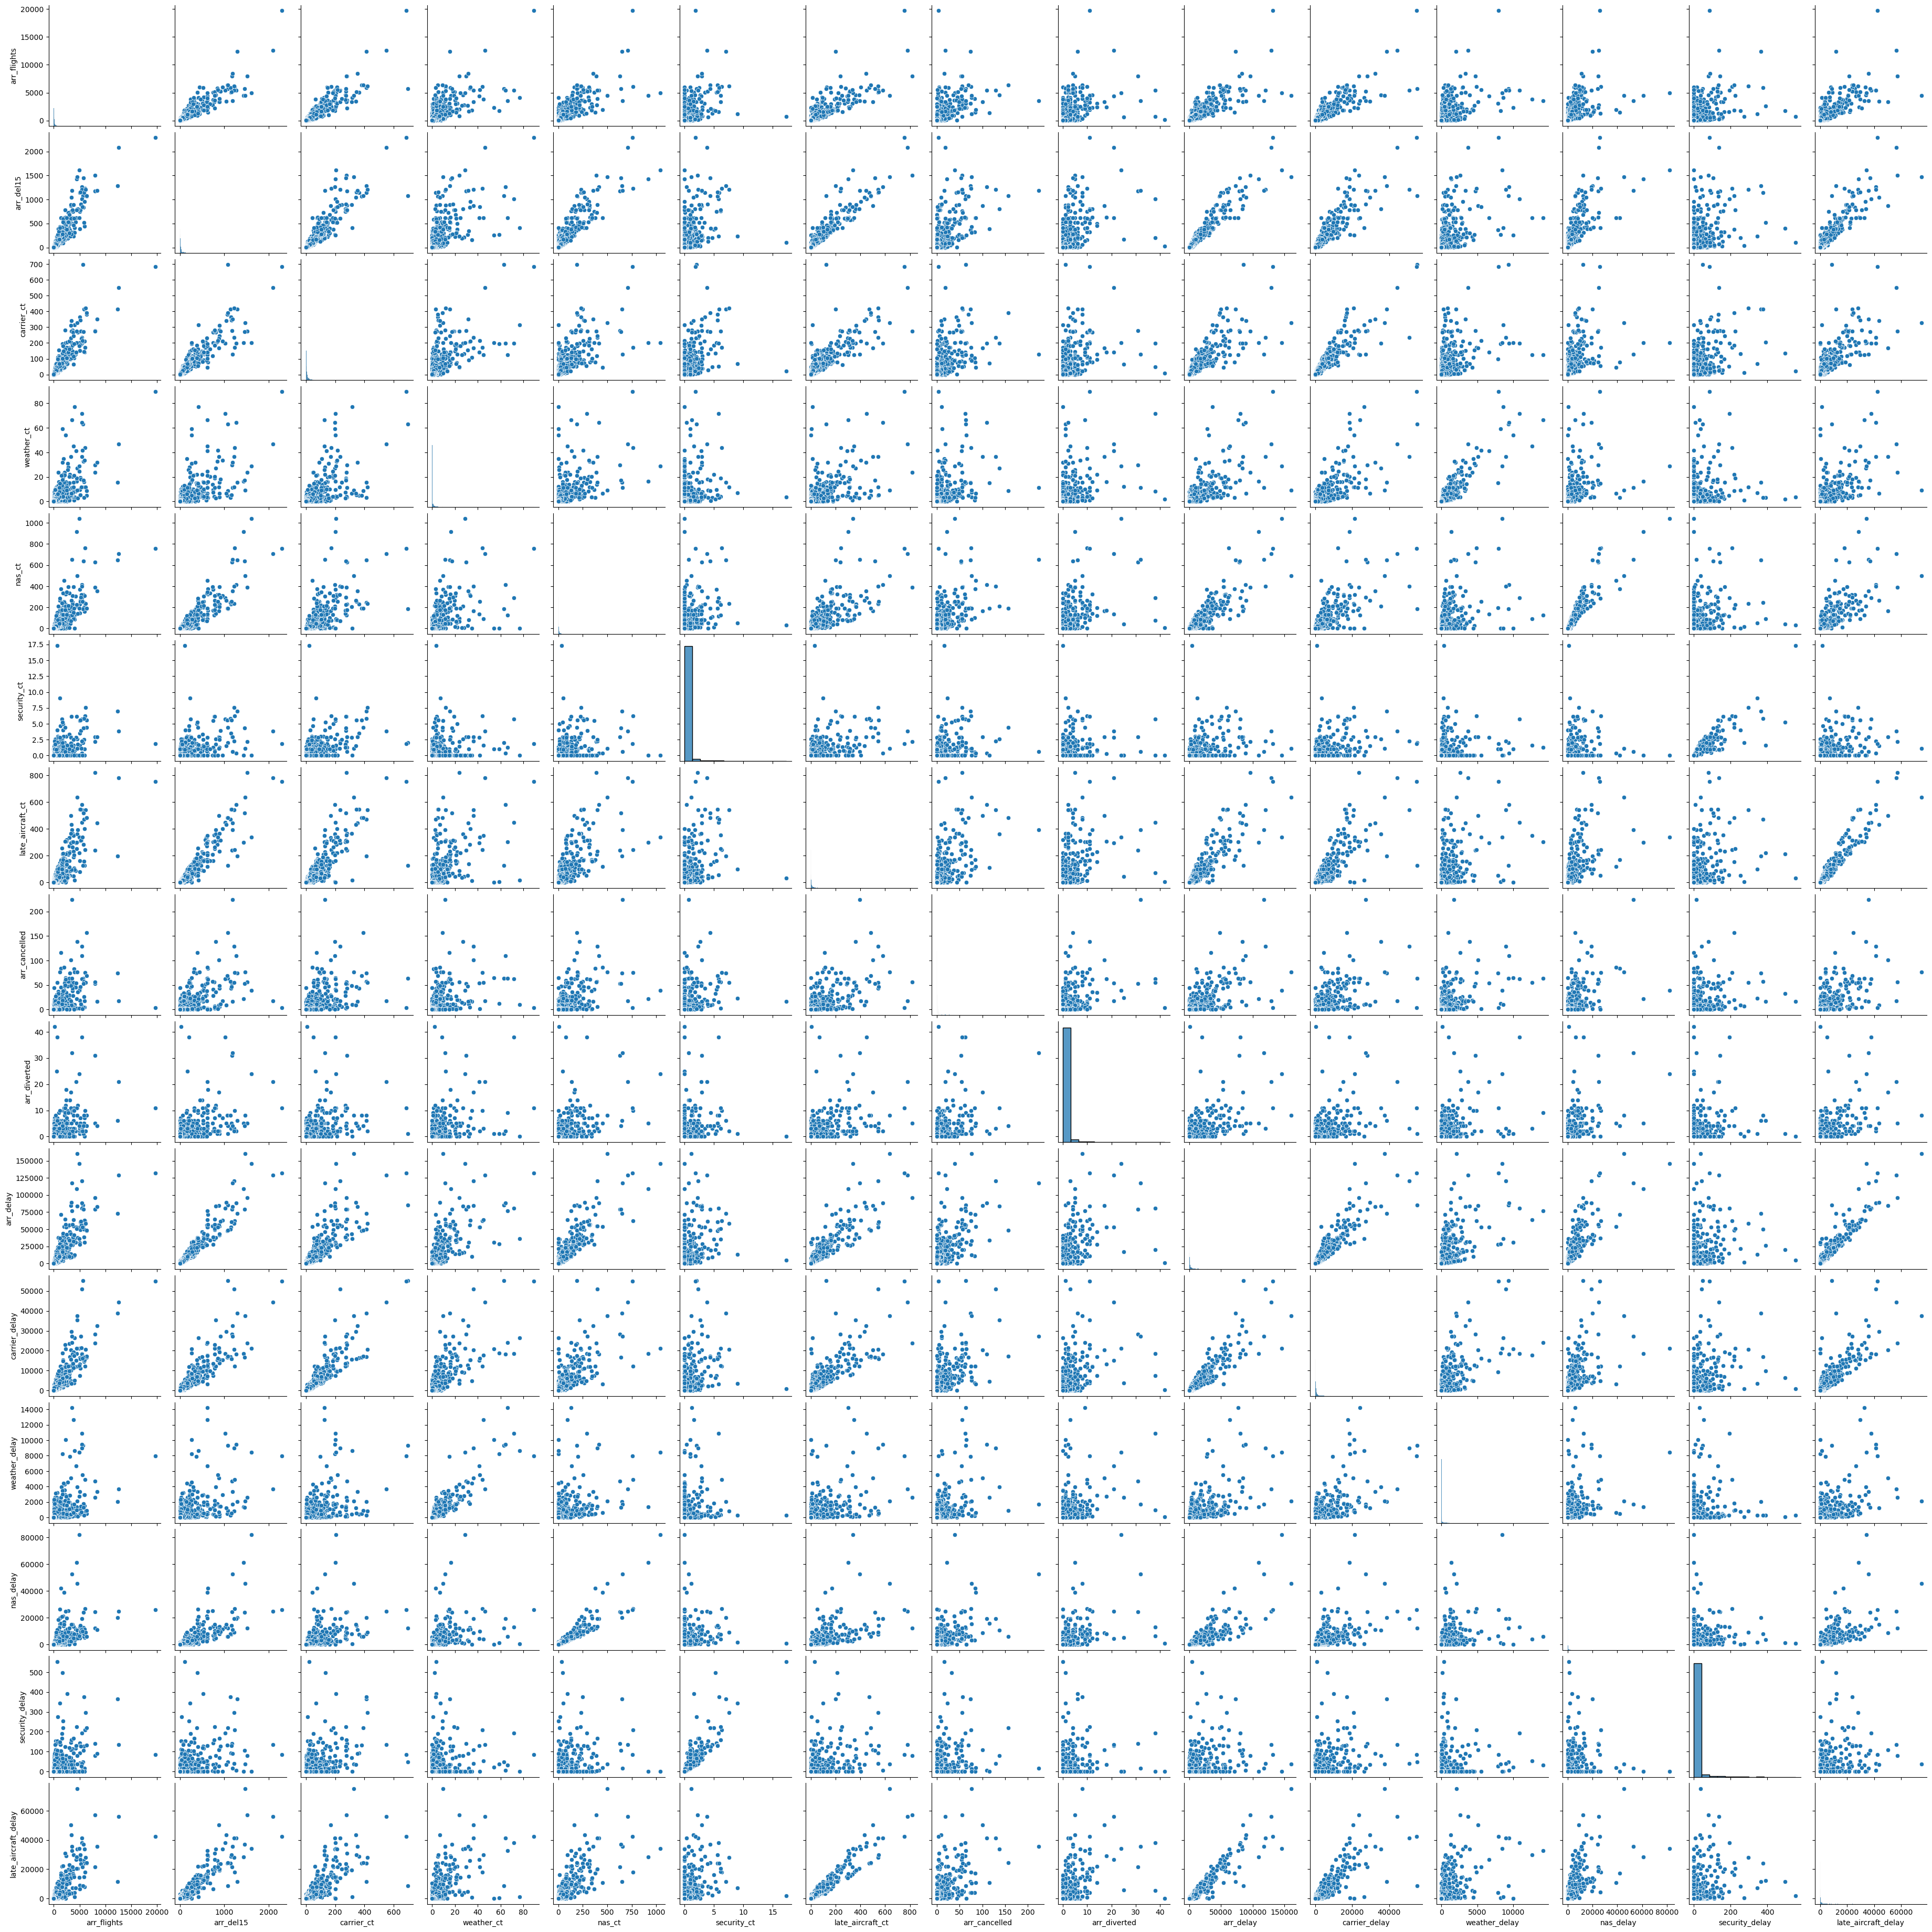

In [38]:
sns.pairplot(airline_delay.drop(['year', 'month', 'carrier', 'carrier_name'], axis=1))

In [45]:
frame_count_delayes = airline_delay.groupby(['carrier', 'year']).count()['carrier_name'].unstack(level = -1) #number of times each carrier registered delayes

<Axes: ylabel='Frequency'>

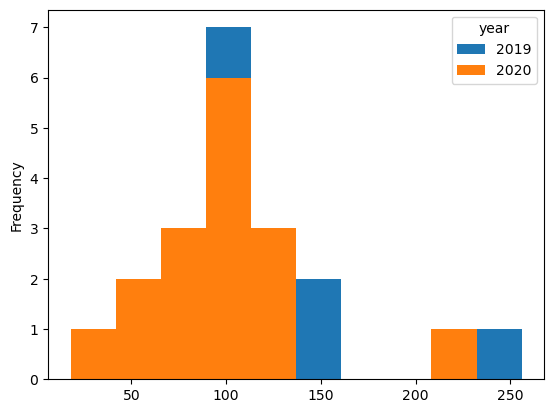

In [76]:
frame_count_delayes.plot(kind = 'hist')


In [77]:
airline_delay.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

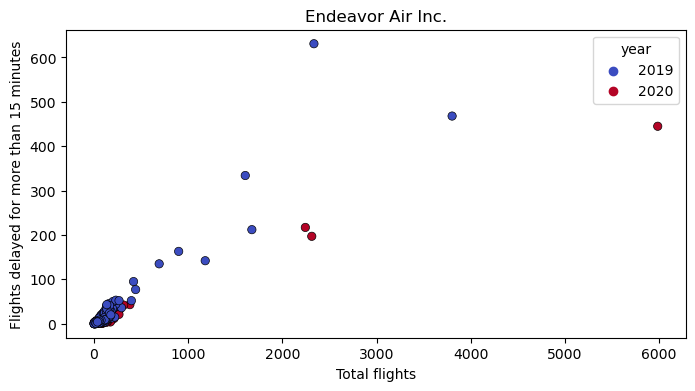

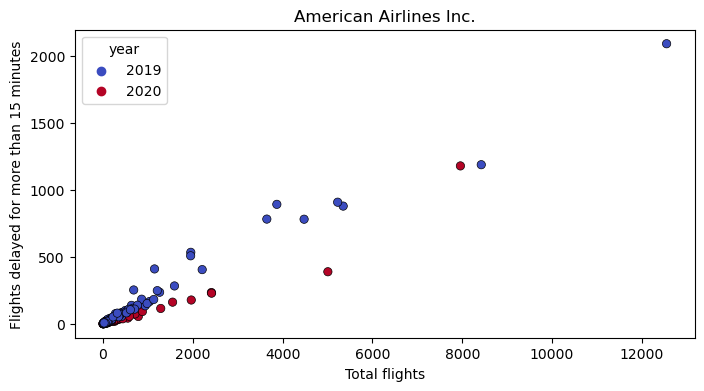

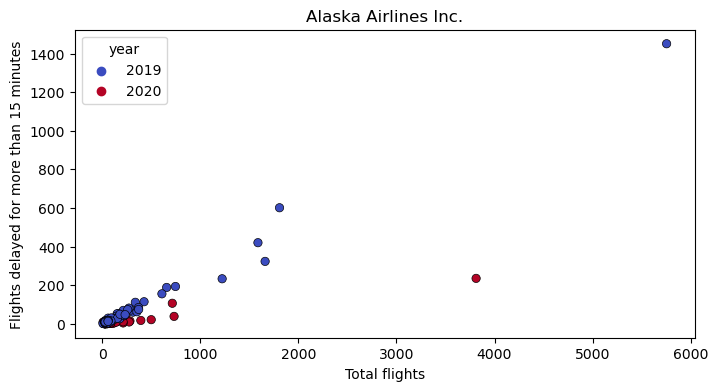

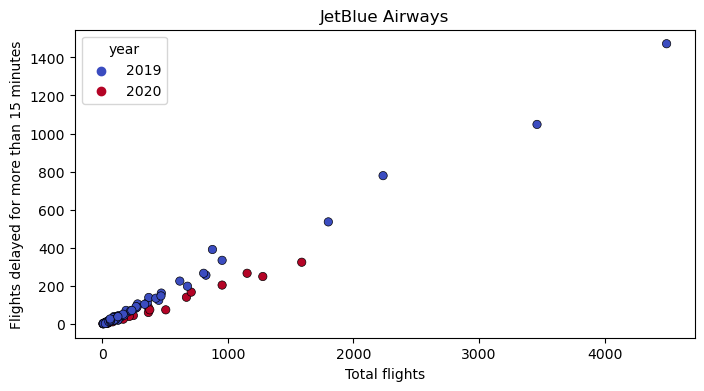

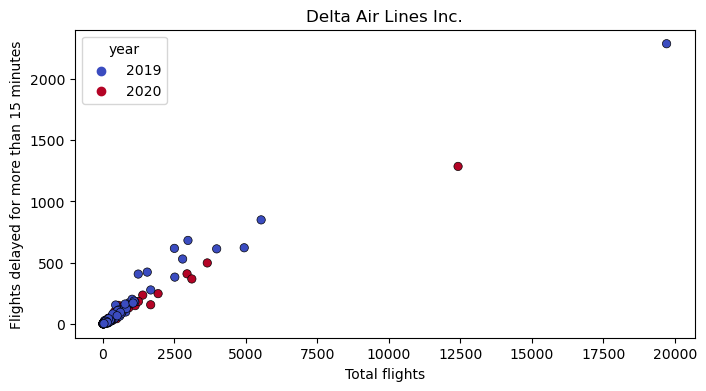

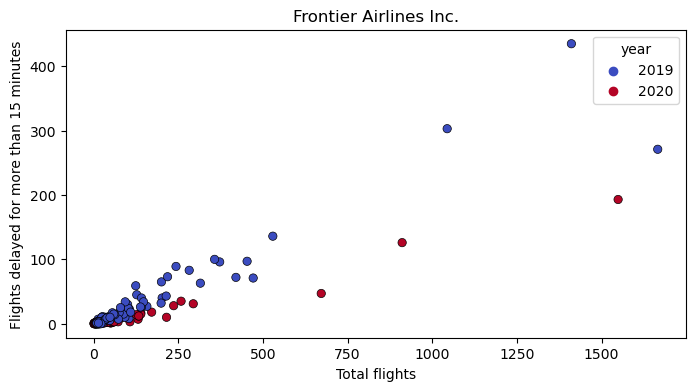

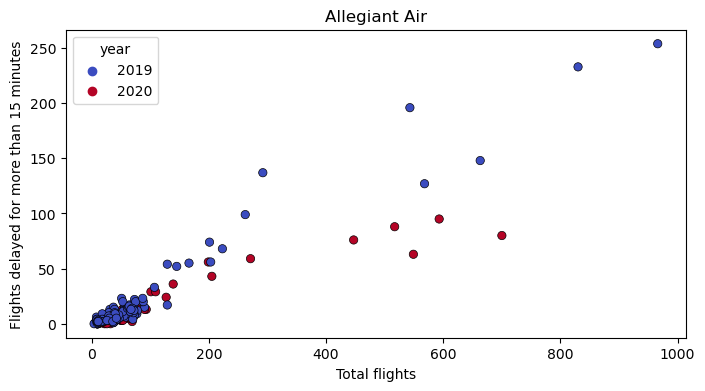

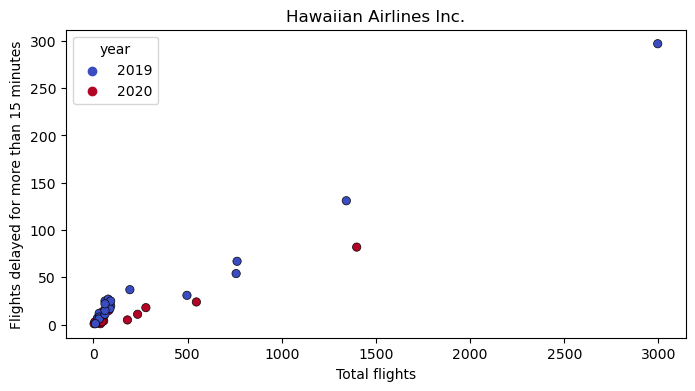

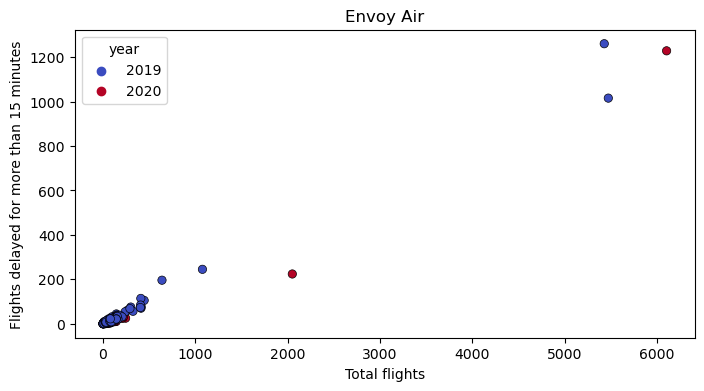

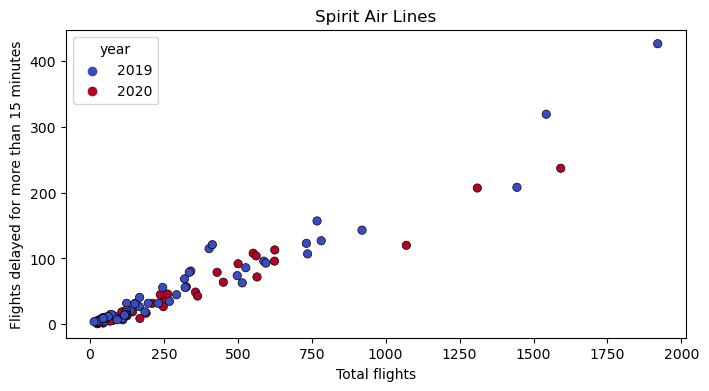

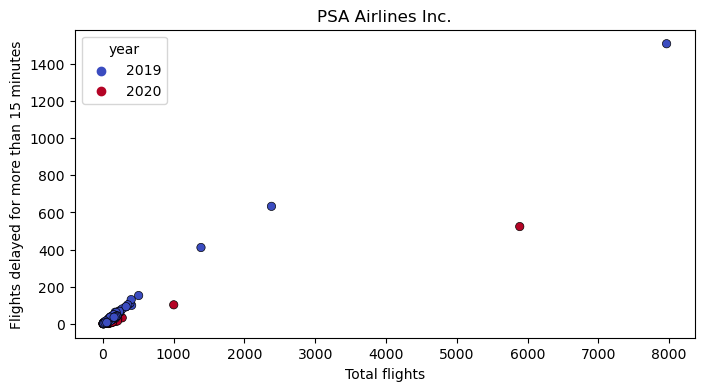

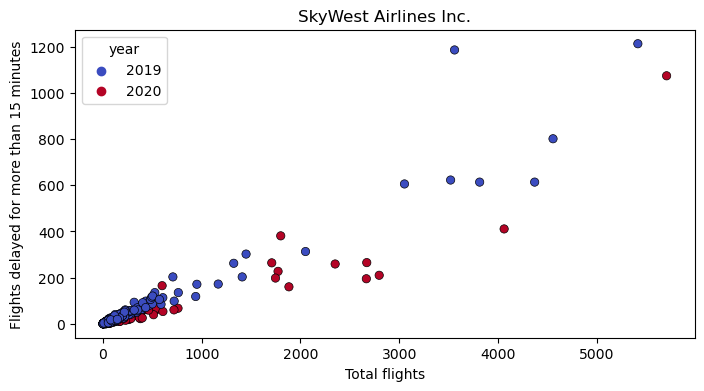

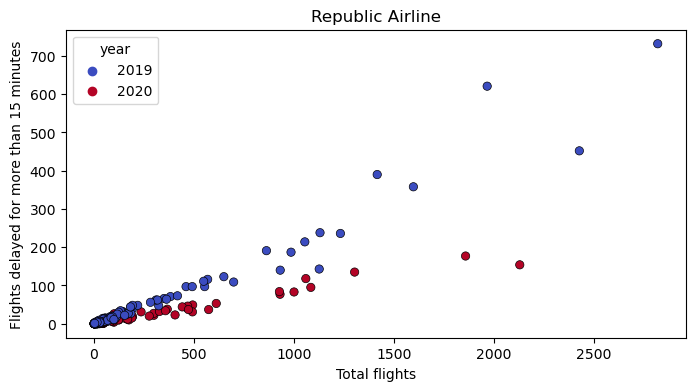

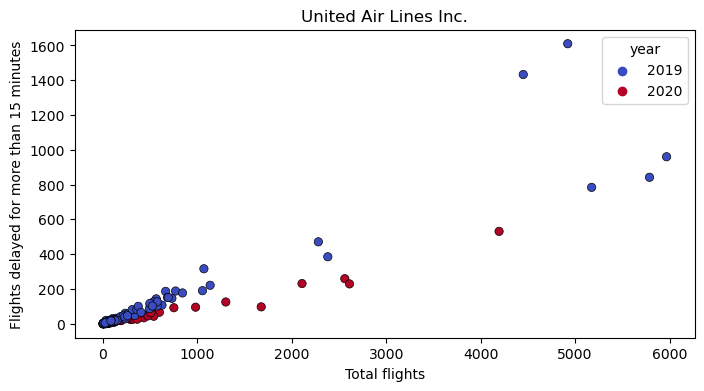

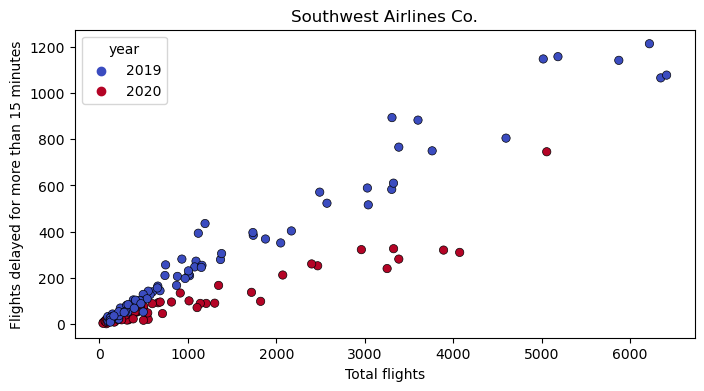

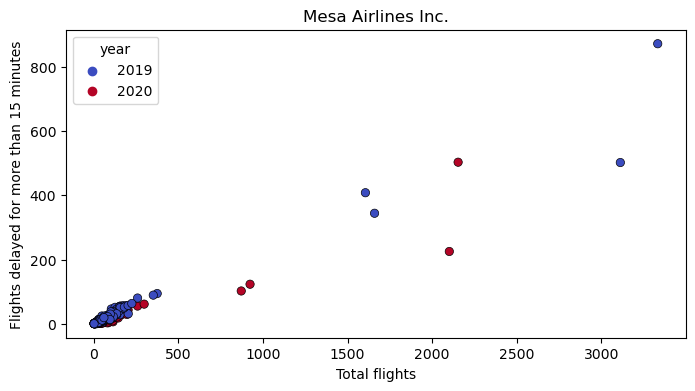

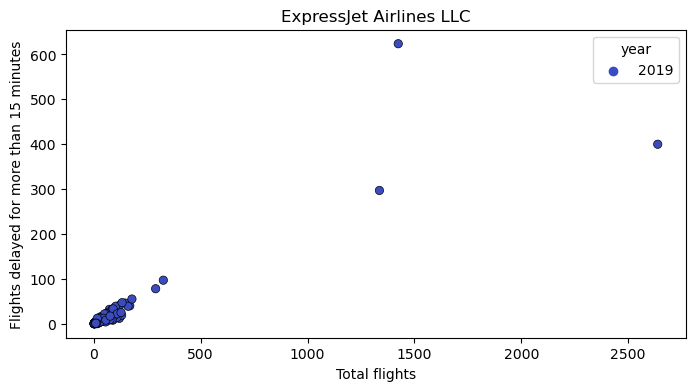

In [120]:
carriers = airline_delay['carrier_name'].unique()
for i in carriers:
    dataframe = airline_delay[airline_delay['carrier_name'] == i]
    fig,axes = plt.subplots(1,1, figsize = (8,4))
    sns.scatterplot(data = dataframe, x = 'arr_flights', y = 'arr_del15', hue = 'year', palette = 'coolwarm',  edgecolor = 'black')
    plt.xlabel('Total flights')
    plt.ylabel('Flights delayed for more than 15 minutes')
    plt.title(i)

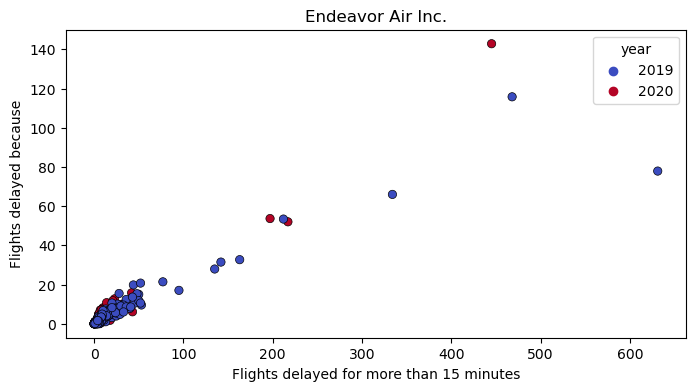

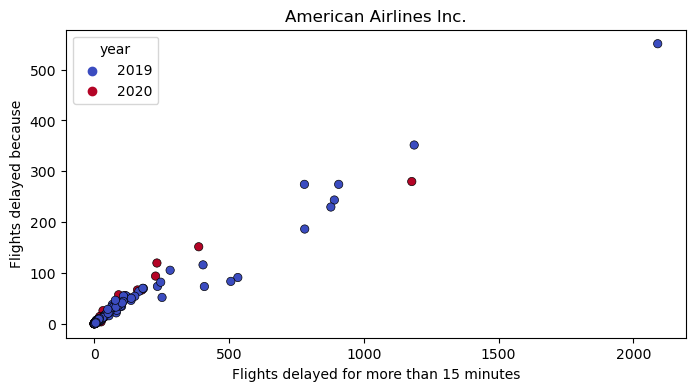

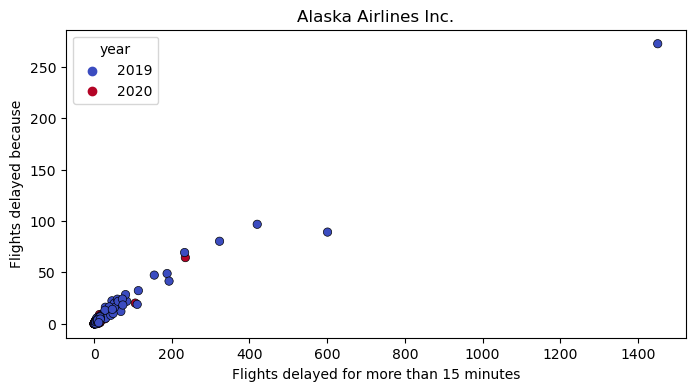

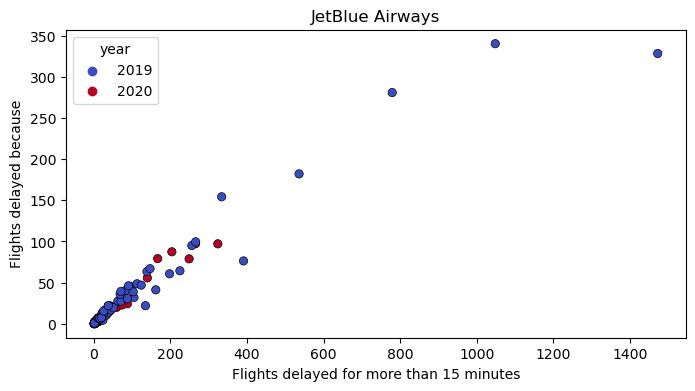

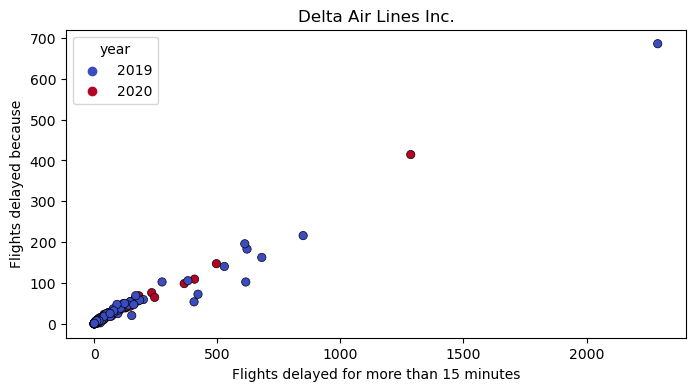

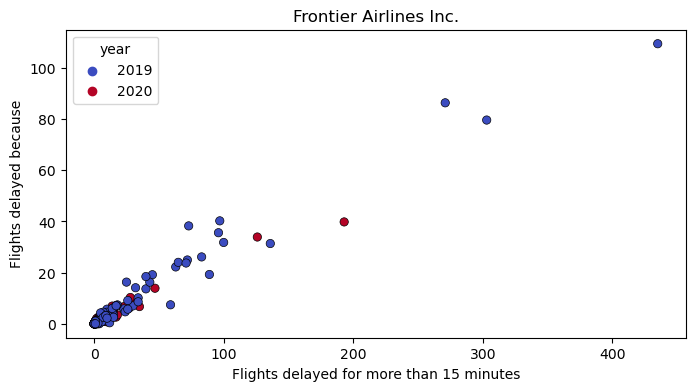

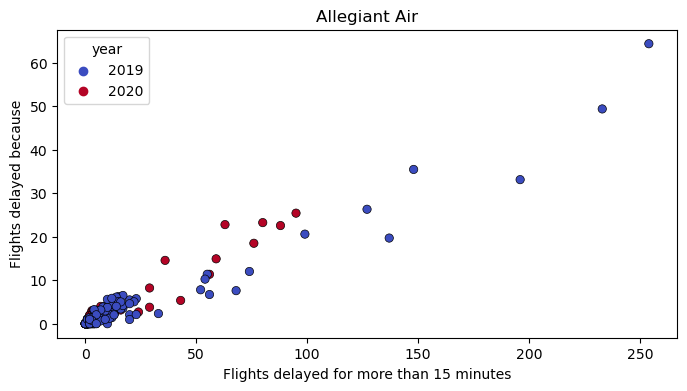

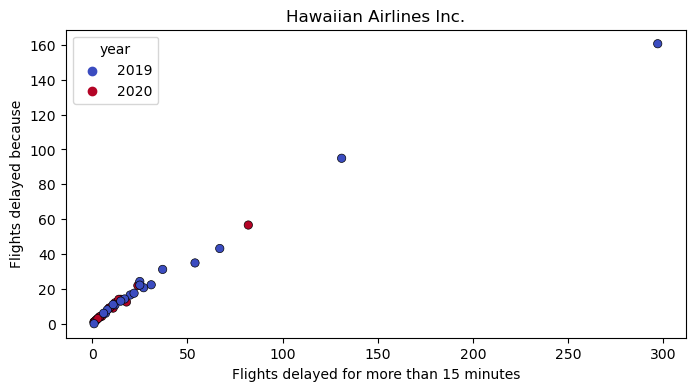

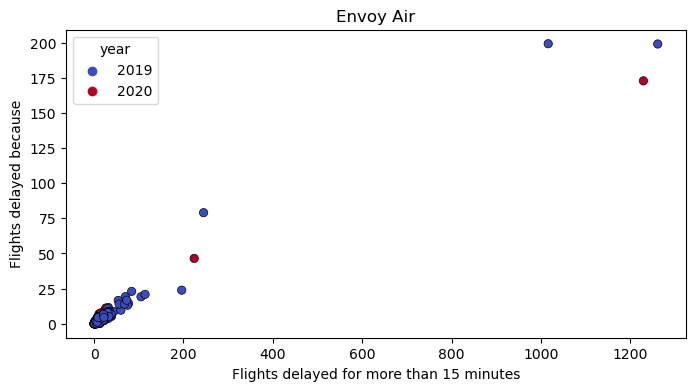

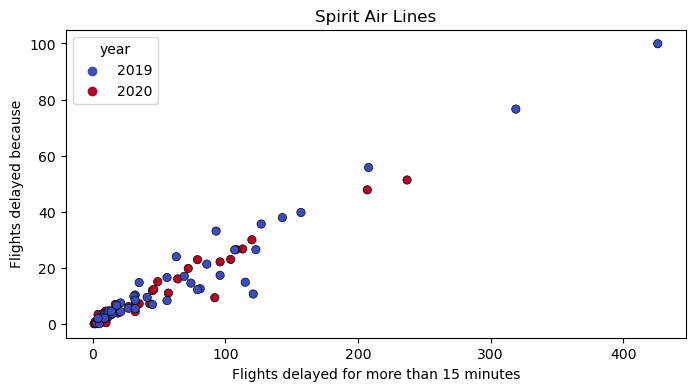

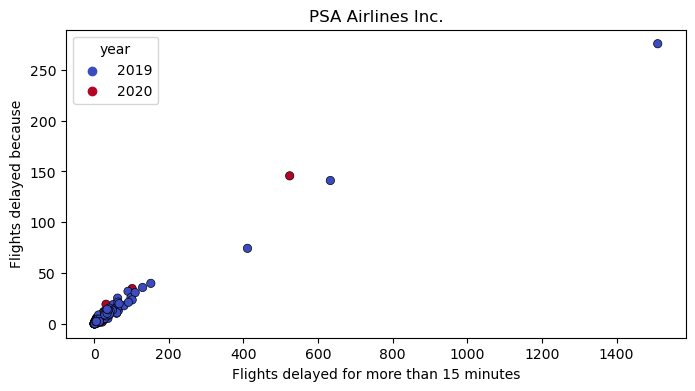

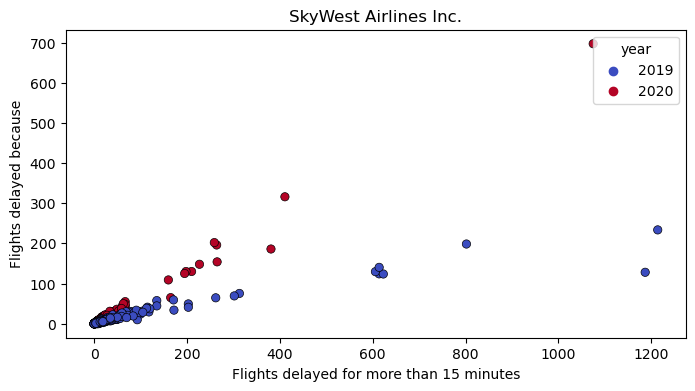

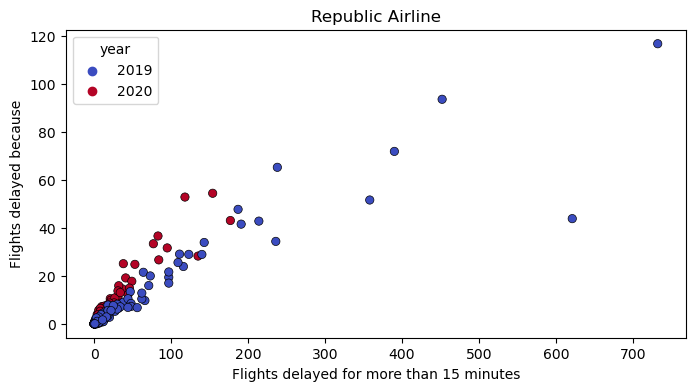

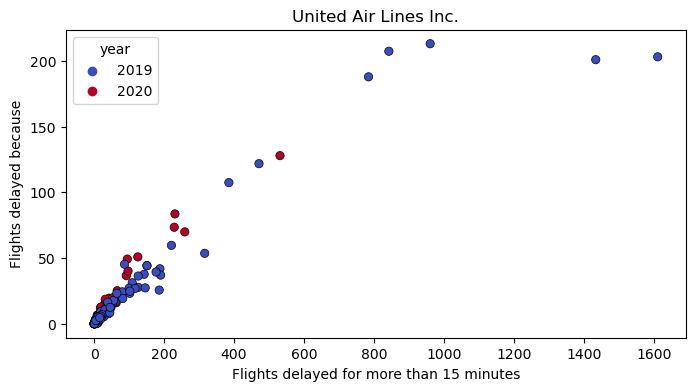

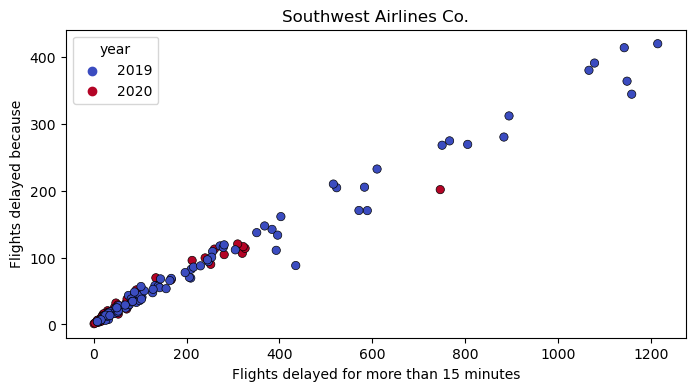

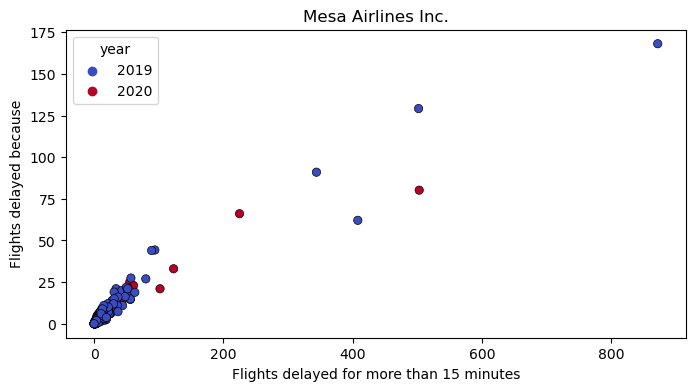

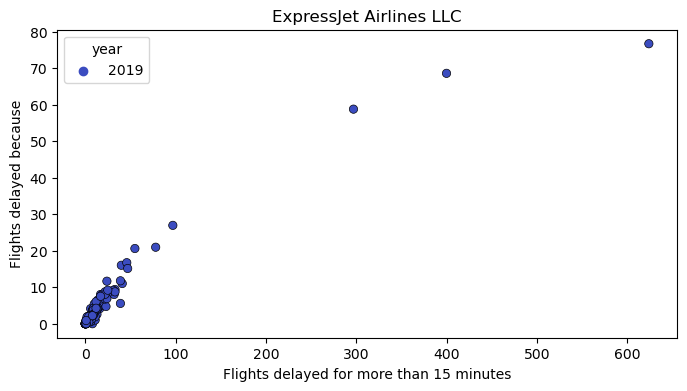

In [123]:
carriers = airline_delay['carrier_name'].unique()
for i in carriers:
    dataframe = airline_delay[airline_delay['carrier_name'] == i]
    fig,axes = plt.subplots(1,1, figsize = (8,4))
    sns.scatterplot(data = dataframe, x = 'arr_del15', y = 'carrier_ct', hue = 'year', palette = 'coolwarm',  edgecolor = 'black')
    plt.xlabel('Flights delayed for more than 15 minutes')
    plt.ylabel('Flights delayed because')
    plt.title(i)

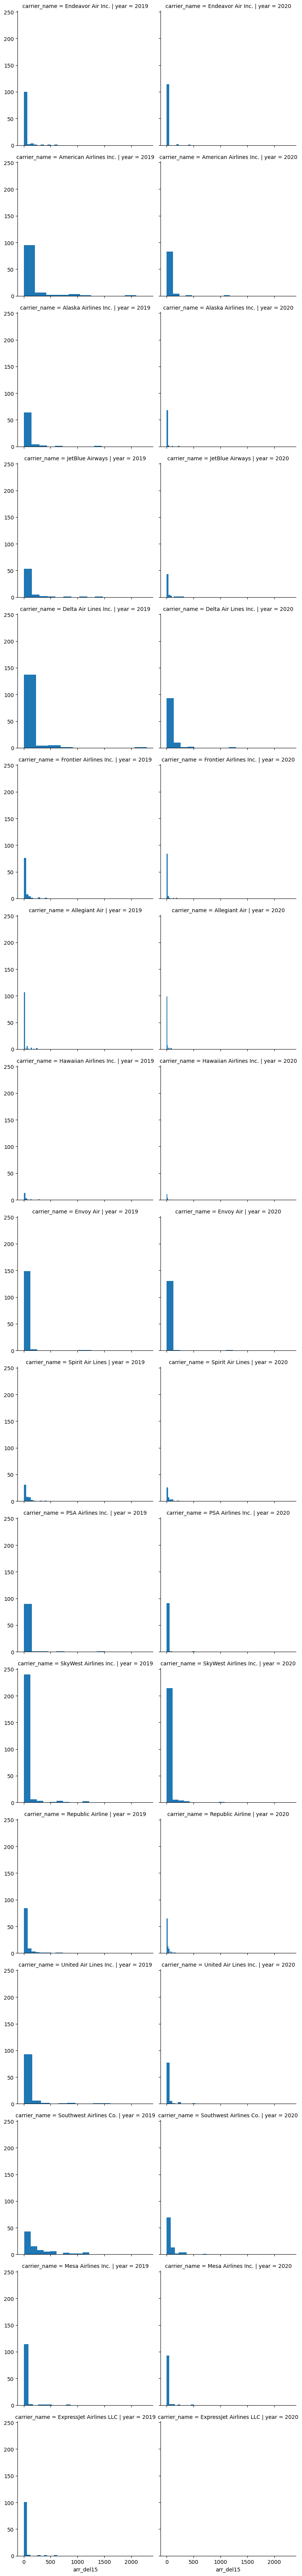

In [127]:
g = sns.FacetGrid(data = airline_delay, row = 'carrier_name', col = 'year', aspect = 1, height = 4)
g.map(plt.hist, 'arr_del15')
plt.tight_layout()

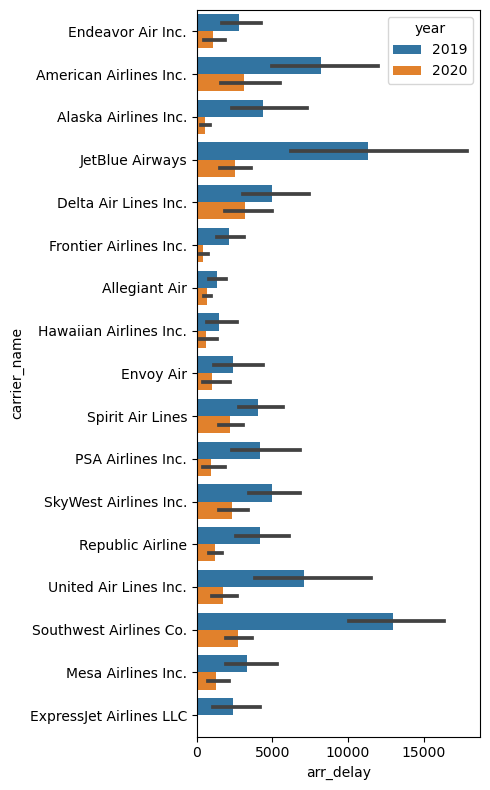

In [136]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'arr_delay', hue = 'year')
plt.tight_layout()

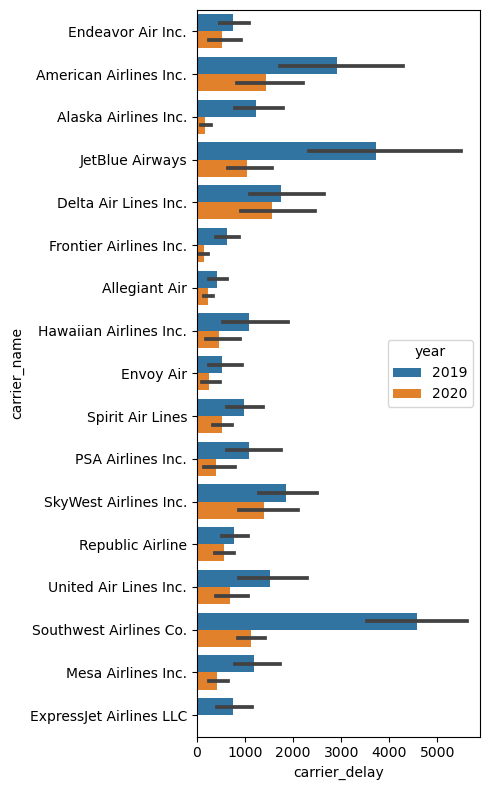

In [137]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'carrier_delay', hue = 'year')
plt.tight_layout()

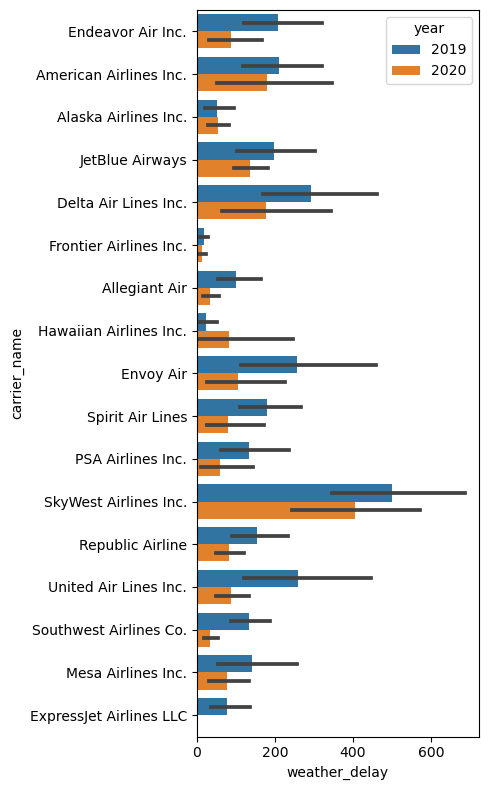

In [138]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'weather_delay', hue = 'year')
plt.tight_layout()

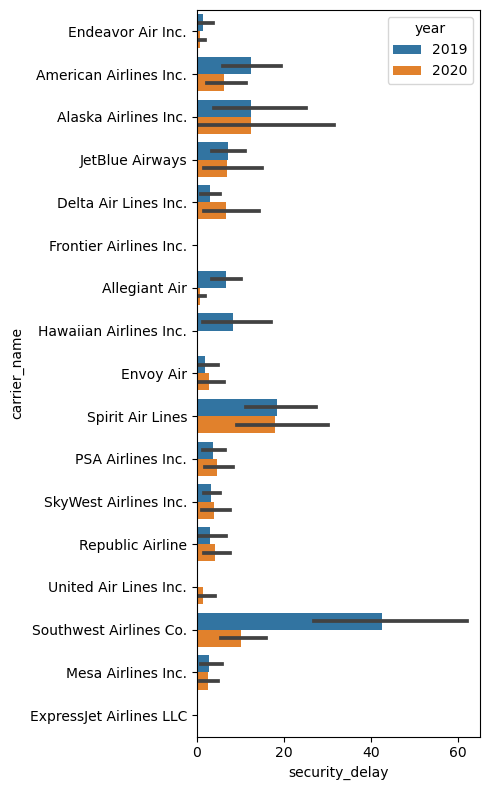

In [139]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'security_delay', hue = 'year')
plt.tight_layout()

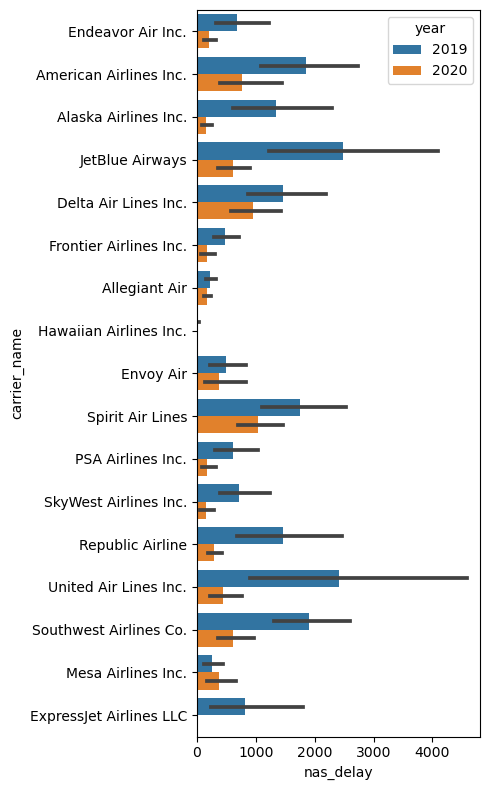

In [141]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'nas_delay', hue = 'year')
plt.tight_layout()

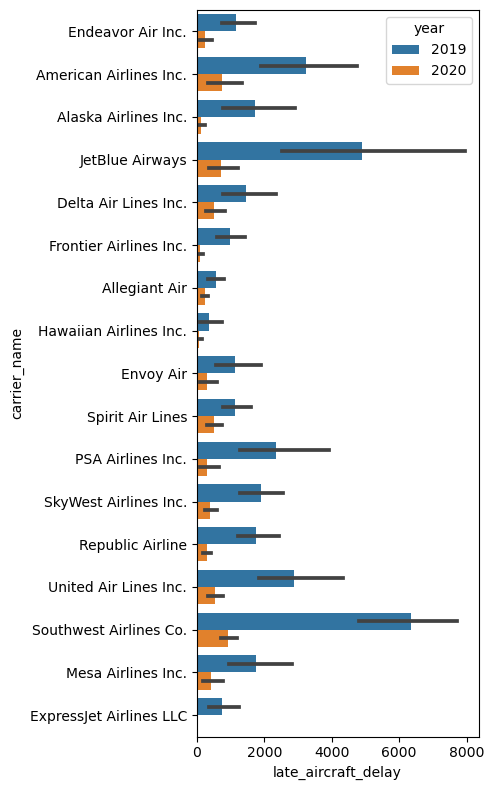

In [142]:
carriers = airline_delay['carrier_name'].unique()
fig, axes = plt.subplots(1,1, figsize = (5, 8))
sns.barplot(data = airline_delay, y = 'carrier_name', x = 'late_aircraft_delay', hue = 'year')
plt.tight_layout()

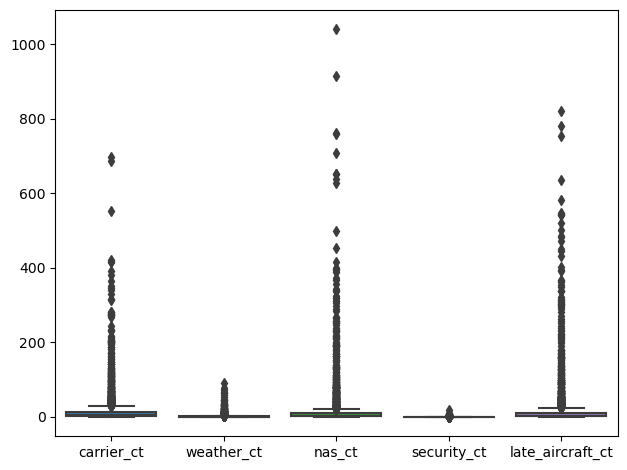

In [186]:
fig, axes = plt.subplots(1,1)
sns.boxplot(data = airline_delay[['carrier_ct', 'weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct']])
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_20332\2947938884.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_frame = airline_delay_2019.groupby(['carrier_name']).sum()


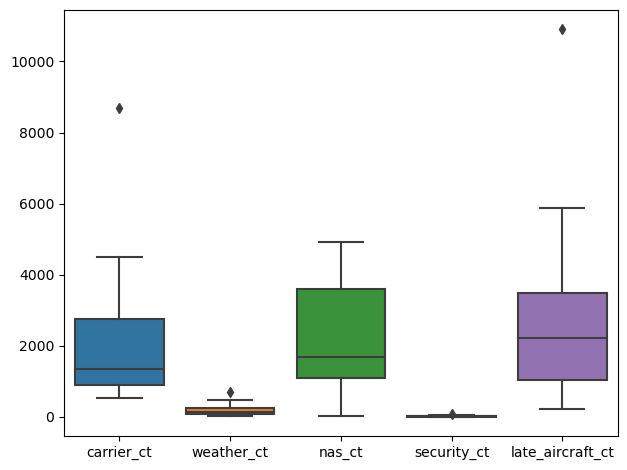

In [189]:
airline_delay_2019 = airline_delay[airline_delay['year'] == 2019]
new_frame = airline_delay_2019.groupby(['carrier_name']).sum()
fig, axes = plt.subplots(1,1)
sns.boxplot(data = new_frame[['carrier_ct', 'weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct']])
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_20332\1211883162.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_frame = airline_delay_2020.groupby(['carrier_name']).sum()


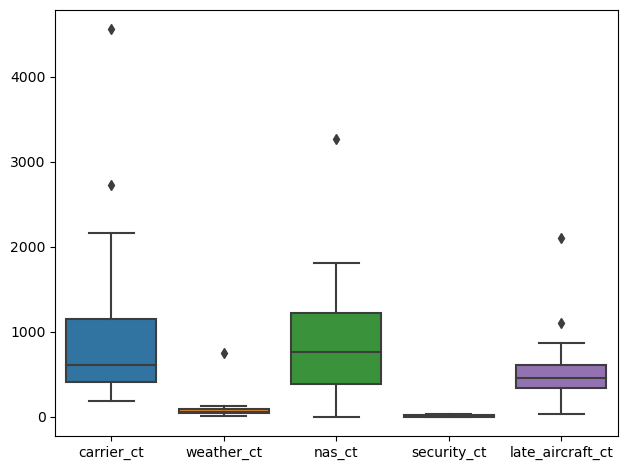

In [191]:
airline_delay_2020 = airline_delay[airline_delay['year'] == 2020]
new_frame = airline_delay_2020.groupby(['carrier_name']).sum()
fig, axes = plt.subplots(1,1)
sns.boxplot(data = new_frame[['carrier_ct', 'weather_ct', 'nas_ct','security_ct', 'late_aircraft_ct']])
plt.tight_layout()